In [2]:
!pip install qiskit qiskit-aer matplotlib pylatexenc qiskit_ibm_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 62.3 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.5/378.5 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=bf1b8b98d4a45a545a647f913597c38e11ced9b5c1a198bf3e887f66cca07108
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588

TESTING BALANCED ORACLE

Circuit with Balanced Oracle:
          ┌───┐          ┌───┐     ┌─┐           
q_0: ─|0>─┤ H ├───────■──┤ H ├─────┤M├───────────
          ├───┤       │  └───┘┌───┐└╥┘     ┌─┐   
q_1: ─|0>─┤ H ├───────┼────■──┤ H ├─╫──────┤M├───
          ├───┤       │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_2: ─|0>─┤ H ├───────┼────┼────■───╫─┤ H ├─╫─┤M├
          ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ─|0>─┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
          └───┘└───┘└───┘└───┘└───┘ ║       ║  ║ 
c: 3/═══════════════════════════════╩═══════╩══╩═
                                    0       1  2 

Results for Balanced Oracle:
{'111': 500}


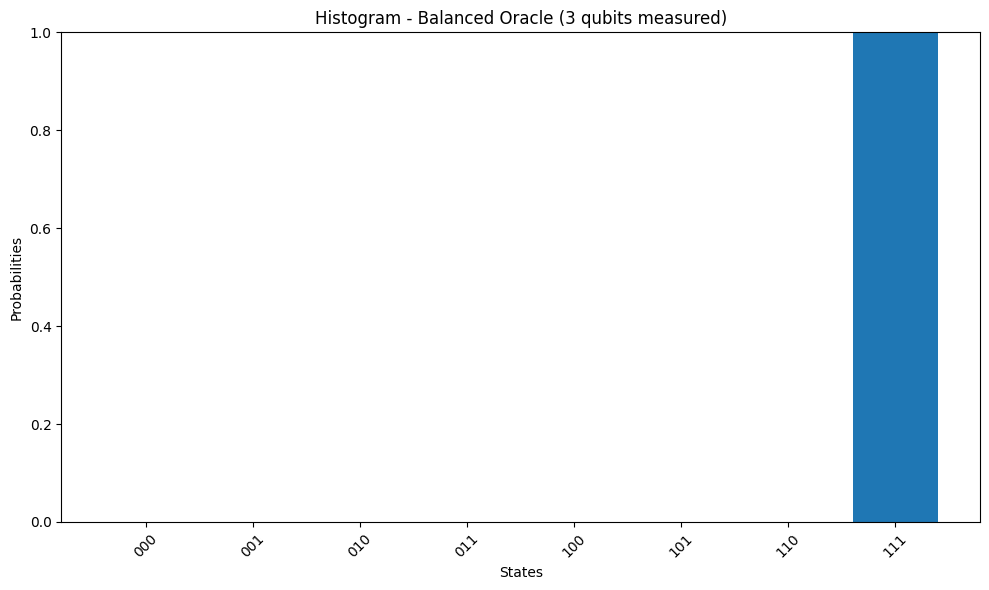


Probability of |000>: 0.000
Result: The function is BALANCED

TESTING CONSTANT ORACLE

Circuit with Constant Oracle:
          ┌───┐┌───┐┌─┐      
q_0: ─|0>─┤ H ├┤ H ├┤M├──────
          ├───┤├───┤└╥┘┌─┐   
q_1: ─|0>─┤ H ├┤ H ├─╫─┤M├───
          ├───┤├───┤ ║ └╥┘┌─┐
q_2: ─|0>─┤ H ├┤ H ├─╫──╫─┤M├
          ├───┤├───┤ ║  ║ └╥┘
q_3: ─|0>─┤ X ├┤ H ├─╫──╫──╫─
          └───┘└───┘ ║  ║  ║ 
c: 3/════════════════╩══╩══╩═
                     0  1  2 

Results for Constant Oracle:
{'000': 500}


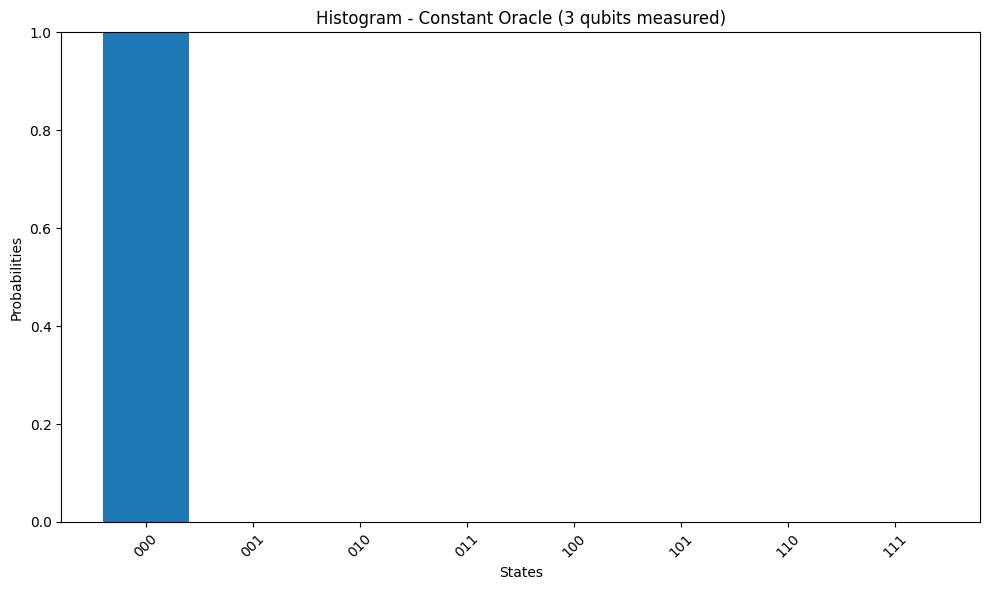


Probability of |000>: 1.000
Result: The function is CONSTANT


In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from collections import defaultdict

# Define balanced oracle
def balanced_oracle(circuit, qubits, ancilla):
    """Apply a balanced oracle that flips the ancilla for half of the inputs"""
    circuit.cx(qubits[0], ancilla)
    circuit.cx(qubits[1], ancilla)
    circuit.cx(qubits[2], ancilla)

# Define constant oracle
def constant_oracle(circuit, qubits, ancilla):
    """Apply a constant oracle that either does nothing or always flips"""
    # Option 1: Do nothing (f(x) = 0 for all x)
    pass
    # Option 2: Always flip (f(x) = 1 for all x) - uncomment next line to test
    # circuit.x(ancilla)

# Function to run Deutsch-Jozsa algorithm
def deutsch_jozsa(oracle_function, oracle_name):
    qreg_q = QuantumRegister(4, 'q')
    creg_c = ClassicalRegister(3, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
    
    # Initialize qubits
    circuit.reset(qreg_q[0])
    circuit.reset(qreg_q[1])
    circuit.reset(qreg_q[2])
    circuit.reset(qreg_q[3])
    
    # Apply Hadamard to input qubits
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.h(qreg_q[2])
    
    # Prepare ancilla in |-> state
    circuit.x(qreg_q[3])
    circuit.h(qreg_q[3])
    
    # Apply oracle
    oracle_function(circuit, [qreg_q[0], qreg_q[1], qreg_q[2]], qreg_q[3])
    
    # Apply Hadamard to input qubits (interference)
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.h(qreg_q[2])
    
    # Measure only input qubits (0, 1, 2) - NOT the ancilla (qubit 3)
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[2], creg_c[2])

    
    print(f"\nCircuit with {oracle_name}:")
    print(circuit.draw())
    
    # Simulate
    simulator = AerSimulator()
    result_sim = simulator.run(circuit, shots=500).result()
    counts_sim = result_sim.get_counts()
    
    print(f"\nResults for {oracle_name}:")
    print(counts_sim)
    
    # Create complete dict with all 3-bit states (8 states: 000 to 111)
    all_states = [format(i, '03b') for i in range(8)]
    full_counts_sim = {state: 0 for state in all_states}
    for k, v in counts_sim.items():
        reversed_k = k[::-1]
        if reversed_k in full_counts_sim:
            full_counts_sim[reversed_k] = v
    
    keys_sim = list(full_counts_sim.keys())
    values_sim = list(full_counts_sim.values())
    
    # Calculate probabilities
    total_sim = sum(values_sim)
    prob_sim = [v / total_sim for v in values_sim]
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.bar(keys_sim, prob_sim)
    plt.xticks(rotation=45)
    plt.title(f'Histogram - {oracle_name} (3 qubits measured)')
    plt.xlabel('States')
    plt.ylabel('Probabilities')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
    
    # Interpret results (check if |000> dominates)
    prob_000_sim = full_counts_sim['000'] / total_sim if '000' in full_counts_sim else 0
    print(f"\nProbability of |000>: {prob_000_sim:.3f}")
    if prob_000_sim > 0.9:
        print(f"Result: The function is CONSTANT")
    else:
        print(f"Result: The function is BALANCED")

# Test balanced oracle
print("="*60)
print("TESTING BALANCED ORACLE")
print("="*60)
deutsch_jozsa(balanced_oracle, "Balanced Oracle")

# Test constant oracle
print("\n" + "="*60)
print("TESTING CONSTANT ORACLE")
print("="*60)
deutsch_jozsa(constant_oracle, "Constant Oracle")

Measurement counts from IBM Quantum Computer:
{'0000': 8, '0001': 0, '0010': 2, '0011': 0, '0100': 1, '0101': 0, '0110': 10, '0111': 0, '1000': 1, '1001': 0, '1010': 8, '1011': 0, '1100': 12, '1101': 0, '1110': 458, '1111': 0}


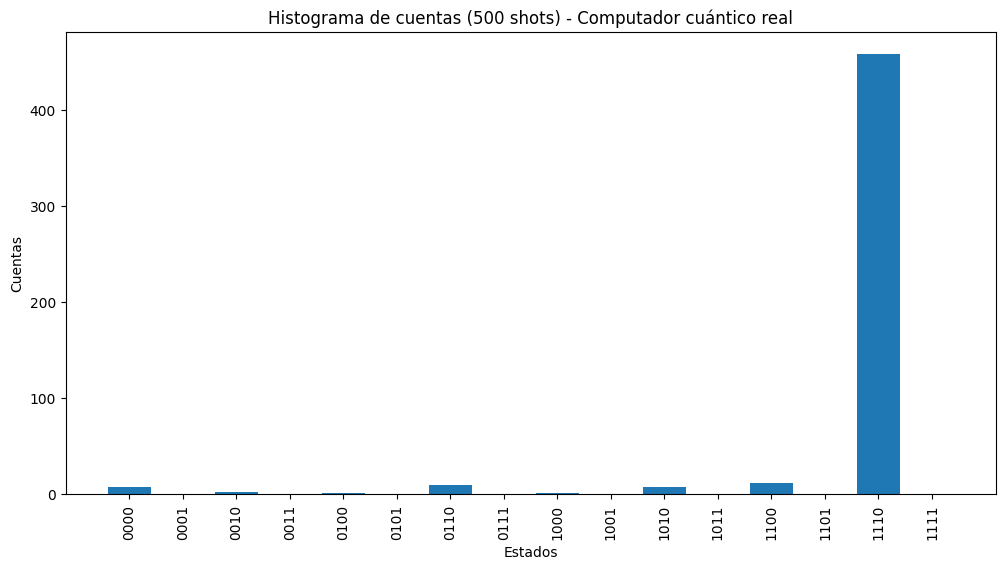

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService
from collections import Counter
import matplotlib.pyplot as plt

service = QiskitRuntimeService(
    channel='ibm_quantum_platform',
    instance='crn:v1:bluemix:public:quantum-computing:us-east:a/3a8d8549846a46289263938b950b3b2b:aa4d5095-5ef8-41f2-adfa-e87691982f17::'
)
job = service.job('d5en4e767pic73828iig')
job_result = job.result()

data = job_result['results'][0]['data']
counts = data['c']

# Extract hexadecimal samples and convert to 3-bit binary (reverse order)
# We only measure 3 qubits (0, 1, 2), NOT the ancilla (qubit 3)
samples = counts.get('samples', [])
bitstrings = [format(int(s, 16), '03b')[::-1] for s in samples]
counts_bin = Counter(bitstrings)

# Complete with zeros for missing states (8 states: 000 to 111)
all_states = [format(i, '03b') for i in range(8)]
full_counts = {state: counts_bin.get(state, 0) for state in all_states}

# Display measurement counts
print("Measurement counts from IBM Quantum Computer:")
print(full_counts)

# Display histogram of results (absolute counts) for all states
keys_full = all_states
values_full = [full_counts[k] for k in keys_full]
plt.figure(figsize=(10, 6))
plt.bar(keys_full, values_full)
plt.xticks(rotation=45)
plt.title('Histogram of counts (500 shots) - Real quantum computer (3 qubits)')
plt.xlabel('States')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

# Interpret results
total_counts = sum(values_full)
prob_000 = full_counts['000'] / total_counts if total_counts > 0 else 0
print(f"\nProbability of |000>: {prob_000:.3f}")
if prob_000 > 0.5:
    print("Result: The function is likely CONSTANT")
else:
    print("Result: The function is likely BALANCED")